In [1]:
import numpy as np
from scipy.interpolate import interp1d
from diffusionpy import D_Matrix,Diffusion_MS_iter,Diffusion_MS,time_dep_surface_cryst,lngi,vpure,dlnai_dlnxi,origin_like,circular,dlnai_dlnxi_loop,Gammaij,Diffusion_MS_cryst
import matplotlib.pyplot as plt

In [2]:

mobile=np.asarray([True,True,True])
Mi=np.asarray([18.015,65000.,230.26])
rho0i=np.asarray([997.,1180.,1320.])
T=298.15+12 #37C
crystpar={"crystallize":np.asarray([False,False,True]),
"deltaHSL":np.asarray([31500.]),
"TSL":np.asarray([429.47]),
"cpSL":np.asarray([87.44]),
"DAPI":np.asarray([6.6E-17]),
"sigma":np.asarray([1.98E-02]),
"kt":np.asarray([5.1E-12]),
"g":np.asarray([3.2]),
"temp":T}


The experimental data was taken from https://doi.org/10.3390/pharmaceutics15051539

In [3]:
texp=np.asarray([15,30,45,60,90,120])

## Dl10
relapi10=np.asarray([10.50583658,19.84435798,28.40466926,38.13229572,52.14007782,62.25680934])
relpoly10=np.asarray([8.62745098,19.21568627,28.62745098,36.8627451,49.01960784,60.78431373])

## Dl20
relapi20=np.asarray([5.836575875,6.614785992,13.61867704,19.06614786,27.62645914,36.96498054])
relpoly20=np.asarray([5.098039216,8.235294118,16.07843137,22.74509804,32.94117647,42.74509804])

## Dl30
relapi30=np.asarray([1.945525292,1.945525292,3.112840467,3.891050584,5.447470817,7.003891051])
relpoly30=np.asarray([1.176470588,1.568627451,3.529411765,5.882352941,6.274509804,9.019607843]) 


In [4]:
nc=3
wv0=0.01
wv8=0.99
# wv8=0.25
def limits(dl0,wv0,wv8):
       wi0=np.asarray([wv0,(1-wv0)*(1-dl0),(1-wv0)*dl0])
       wi8=np.asarray([wv8,(1-wv8)*(1-dl0),(1-wv8)*dl0])
       return wi0,wi8
p=1E5

In [5]:
kij=D_Matrix(np.asarray([-0.128,0.00648,-0.0574]),nc)
par={"mi":np.asarray([1.20469,2420.99, 8.105152]),
"si": np.asarray([2.797059952,2.947, 2.939]),
"ui" :np.asarray([353.95,205.27, 229.45]),
"eAi" :np.asarray([2425.67,0., 934.2]),
"kAi":np.asarray([0.04509,0.02, 0.02]),
"NAi":np.asarray([1.,653., 2.]),
"Mi": Mi,
"kij":kij,
"kijA":np.asarray([[0.]])}

In [6]:
vpures=vpure(p,T,**par)
par["vpure"]=vpures
lngi_fun=lambda wi: lngi(T,wi,**par)
# dlnai_dlnwi_fun=lambda wi: dlnai_dlnxi_loop(T,wi,**par)

In [7]:
nt=101
t=np.linspace(0,texp[-1],nt)*60

#only water
Dvec10=np.asarray([1E-14,1E-17,1E-16])*8000 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-14,1E-17,1E-16])*3000 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-14,1E-17,1E-16])*800  #      (1-0.3)**1.5=0.5856620185738528

#allmbobile
Dvec10=np.asarray([1E-16,1E-16,1E-17])*10000/3 #Ideal (1-0.1)**1.5=0.8538149682454624
Dvec20=np.asarray([1E-16,1E-16,1E-17])*3000/3 #      (1-0.2)**1.5=0.7155417527999328
Dvec30=np.asarray([1E-16,1E-16,1E-17])*400/3  #      (1-0.3)**1.5=0.5856620185738528

L=10E-5
def release_calc(wi0,wi8,Dvec):
       wt,wtz,zvec,Lt,alpha,r=Diffusion_MS_cryst(t,L,Dvec,wi0,wi8,Mi,mobile,crystpar,lngi_fun)
       notreleased=wt/wi0
       release=(1-notreleased)
       return release,alpha,wtz[:,0,:],zvec

dl010=0.1
dl020=0.2
dl030=0.3

wi010,wi810=limits(dl010,wv0,wv8)
wi020,wi820=limits(dl020,wv0,wv8)
wi030,wi830=limits(dl030,wv0,wv8)


release10,alpha10,wasser10,zvec=release_calc(wi010,wi810,Dvec10)
release20,alpha20,wasser20,_=release_calc(wi020,wi820,Dvec20)
release30,alpha30,wasser30,_=release_calc(wi030,wi830,Dvec30)

------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.0322216 seconds ----------------
------------- Initialization and postprocessing took 0.004535 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 2.7638854 seconds ----------------
------------- Initialization and postprocessing took 0.0436738 seconds----------------
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 3.0158321 seconds ----------------
------------- Initialization and postprocessing took 0.0715558 seconds----------------
iter 1: ||F|| = 1.2291024621237385e-09
------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ---------------

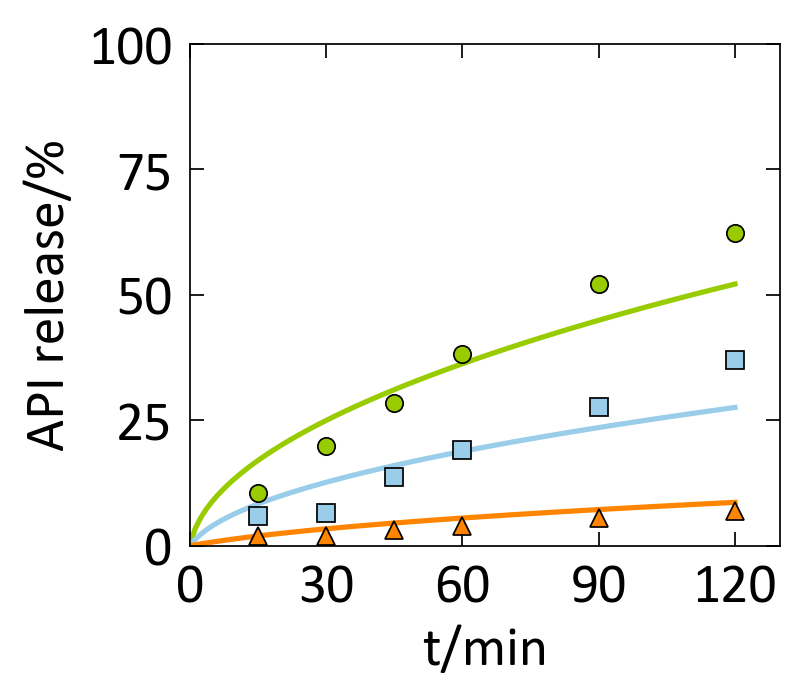

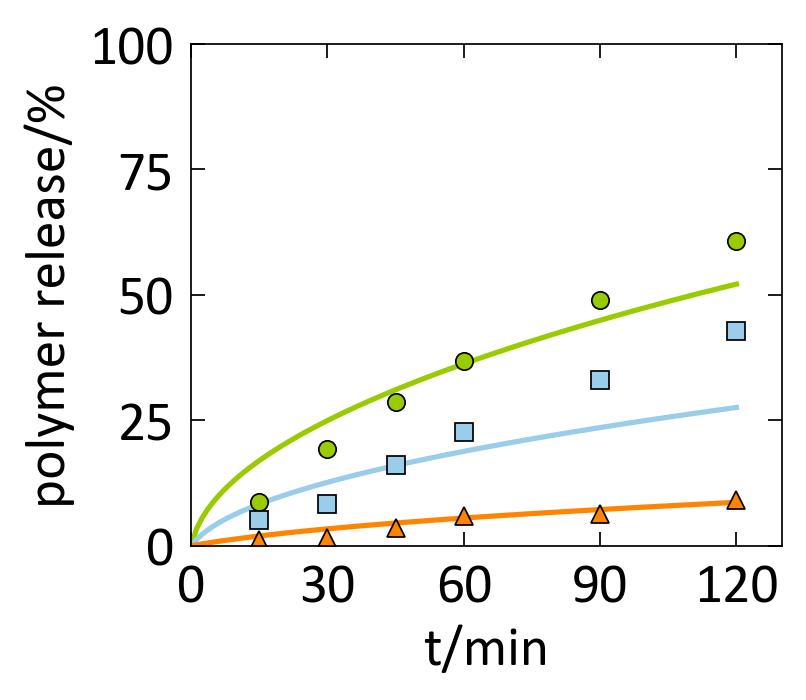

In [8]:
fig,ax=origin_like.subplots()
ax.set_axisbelow(True)
origin_like.plot(ax,t/60,release10[:,2]*100,"g-")
origin_like.plot(ax,t/60,release20[:,2]*100,"c-")
origin_like.plot(ax,t/60,release30[:,2]*100,"-r")

origin_like.plot(ax,texp,relapi10,"go")
origin_like.plot(ax,texp,relapi20,"cs")
origin_like.plot(ax,texp,relapi30,"^r")

ax.set_xlabel("t/min")
ax.set_ylabel("API release/%")
origin_like.set_ticks(ax,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


fig5,ax5=origin_like.subplots()
ax5.set_axisbelow(True)
origin_like.plot(ax5,t/60,release10[:,1]*100,"g-")
origin_like.plot(ax5,t/60,release20[:,1]*100,"c-")
origin_like.plot(ax5,t/60,release30[:,1]*100,"-r")

origin_like.plot(ax5,texp,relpoly10,"go")
origin_like.plot(ax5,texp,relpoly20,"cs")
origin_like.plot(ax5,texp,relpoly30,"^r")

ax5.set_xlabel("t/min")
ax5.set_ylabel("polymer release/%")
origin_like.set_ticks(ax5,0,120,0,100)
plt.ylim(0,100)
plt.xlim(0,130)


plt.show()

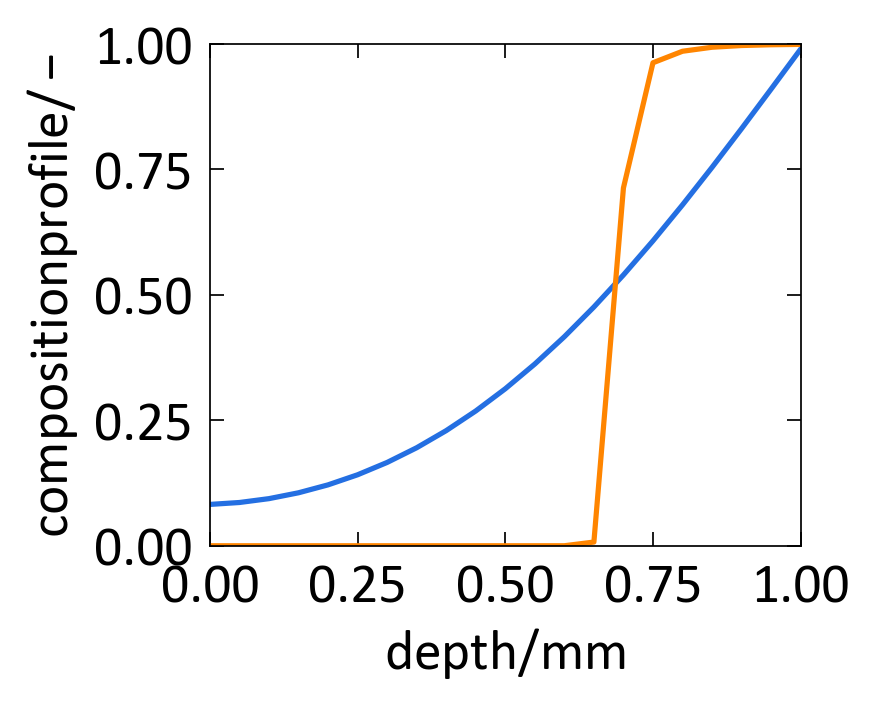

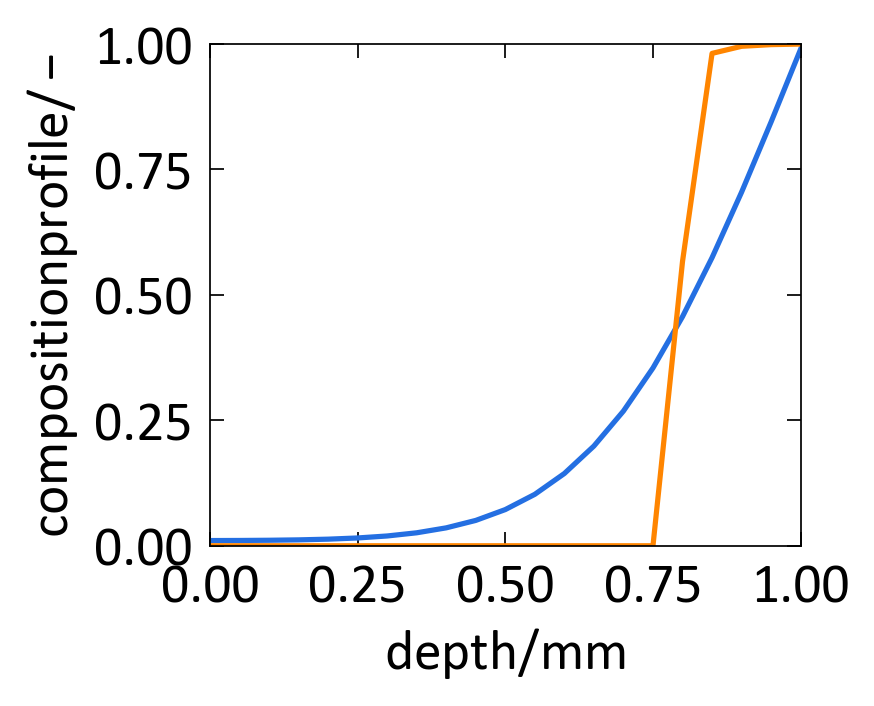

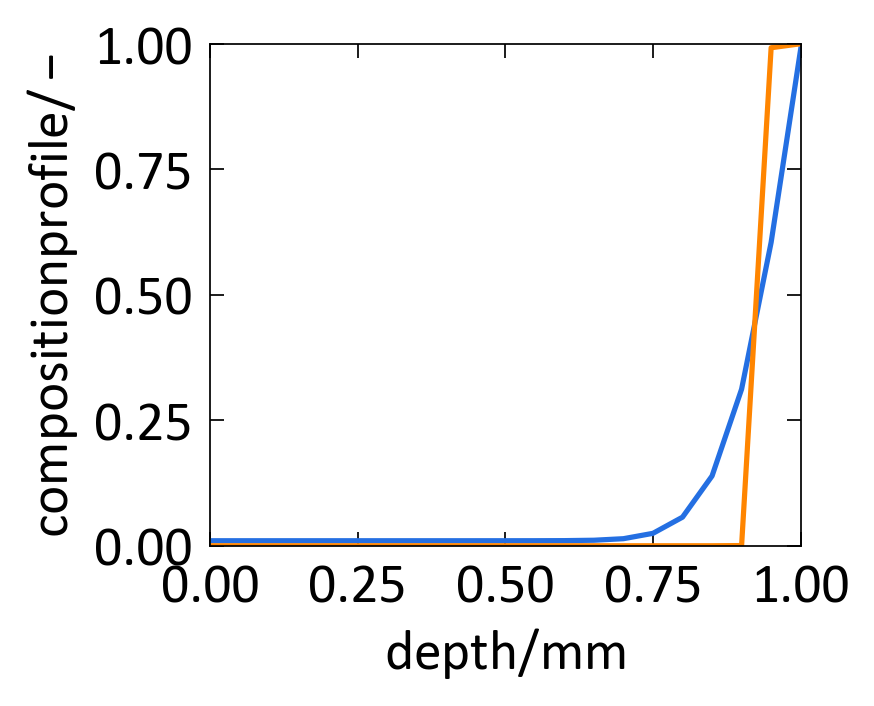

In [12]:

fig12,ax12=origin_like.subplots()
origin_like.plot(ax12,zvec*1E4,wasser10[nt//2,:],"b-")
origin_like.plot(ax12,zvec*1E4,alpha10[:,nt//2],"r-")
fig13,ax13=origin_like.subplots()
origin_like.plot(ax13,zvec*1E4,wasser20[nt//2,:],"b-")
origin_like.plot(ax13,zvec*1E4,alpha20[:,nt//2],"r-")
fig14,ax14=origin_like.subplots()
origin_like.plot(ax14,zvec*1E4,wasser30[nt//2,:],"b-")
origin_like.plot(ax14,zvec*1E4,alpha30[:,nt//2],"r-")
origin_like.set_ticks(ax12,0,1,0,1)
origin_like.set_ticks(ax13,0,1,0,1)
origin_like.set_ticks(ax14,0,1,0,1)

origin_like.set_ylabel(ax12,"composition profile /-")
origin_like.set_xlabel(ax12,"depth /mm")
origin_like.set_ylabel(ax13,"composition profile /-")
origin_like.set_xlabel(ax13,"depth /mm")
origin_like.set_ylabel(ax14,"composition profile /-")
origin_like.set_xlabel(ax14,"depth /mm")



(<Figure size 1750x1250 with 7 Axes>,
 array([<PolarAxes: title={'center': '10.00 min'}>,
        <PolarAxes: title={'center': '20.00 min'}>,
        <PolarAxes: title={'center': '30.00 min'}>,
        <PolarAxes: title={'center': '40.00 min'}>,
        <PolarAxes: title={'center': '50.00 min'}>,
        <PolarAxes: title={'center': '60.00 min'}>], dtype=object))

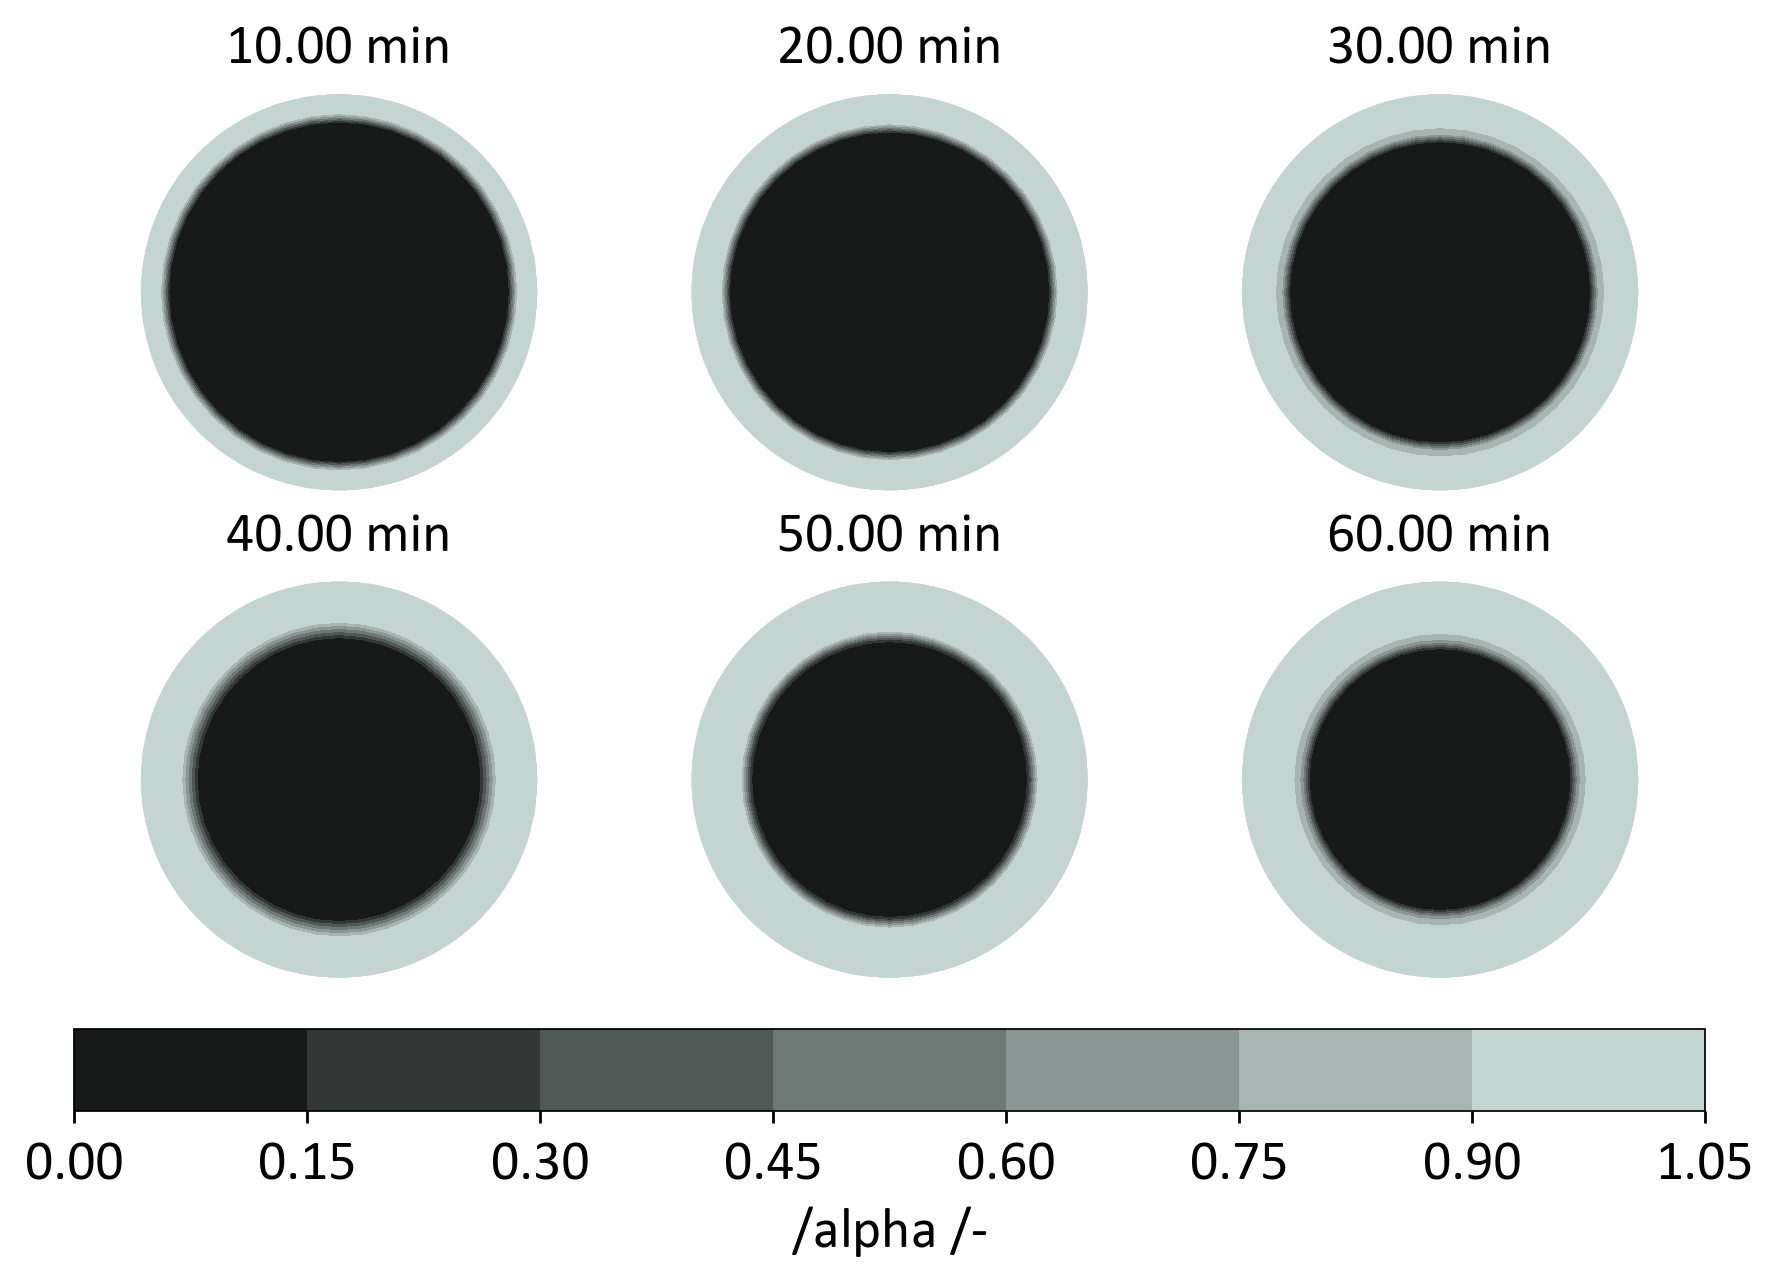

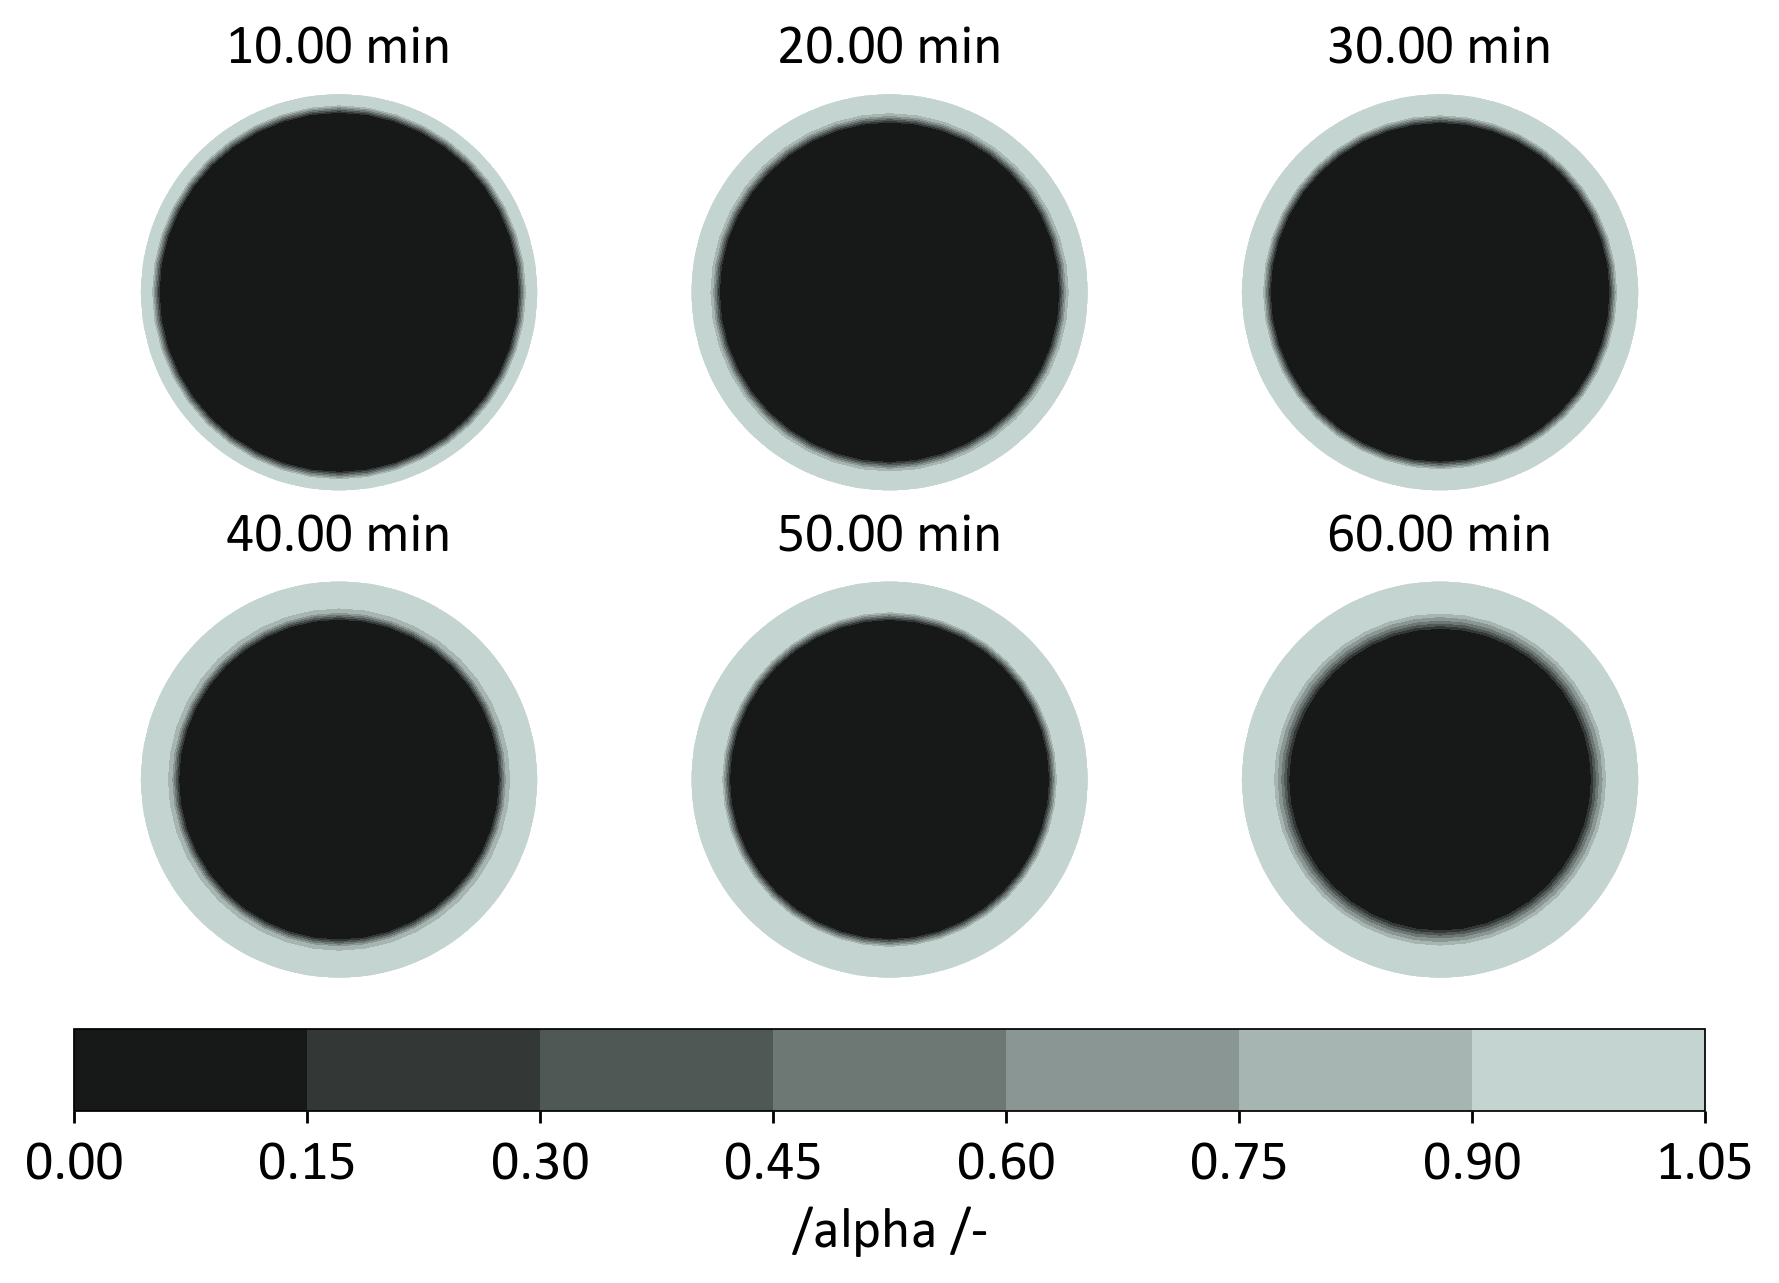

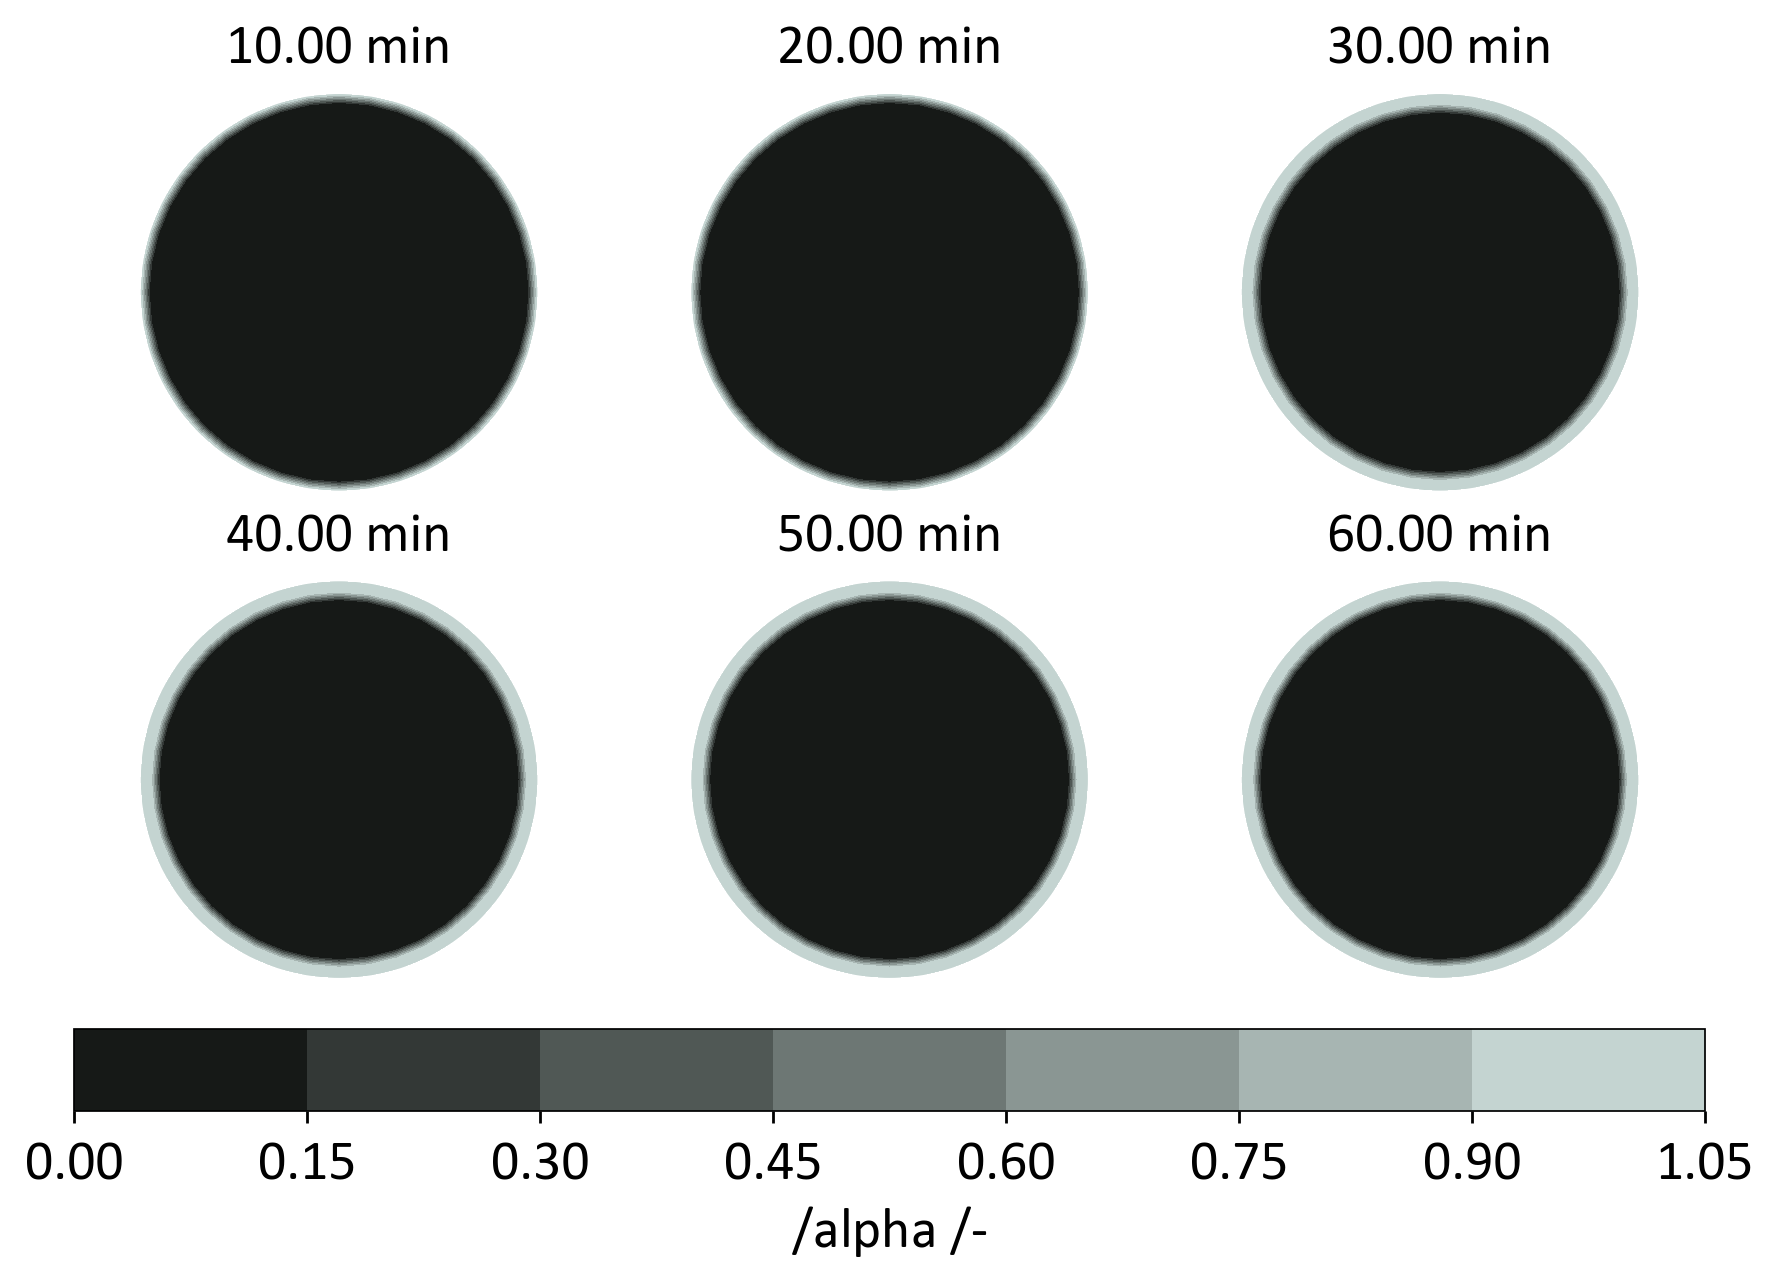

In [11]:
from diffusionpy import circular

from matplotlib.colors import LinearSegmentedColormap


colors = [(12/255, 15/255, 13/255), (196/255, 212/255, 209/255)] # first color is black, last is red
# colors = [(12/255, 15/255, 13/255), (177/255, 188/255, 166/255)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

tinterp=np.asarray([10,20,30,40,50,60])*60

circular(t,zvec,np.fmax(alpha10.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)
circular(t,zvec,np.fmax(alpha20.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)
circular(t,zvec,np.fmax(alpha30.T[:,None,:],0),cmap=cm,vmin=0,vmax=1,label="$/alpha$ /-",tinterp=tinterp)


